In [2]:
# Import all necessary libraries.
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [3]:
# Define utility functions.
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
def plot_confusion_matrix(y_test, y_pred):
    # Plot the confusion matrix.
    fig = plt.figure(figsize=(5,5))
    mat = confusion_matrix(y_test, y_pred)
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    
def plot_roc_curve(clf, x_test):
    # Getting the probabilities for each class.
    y_prob = clf.predict_proba(x_test)

    # Compute ROC curve and ROC area for each class.
    plt.figure(figsize=(5, 5))

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    # Plotting ROC curve.
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class ')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
# Create dataset.
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Split dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

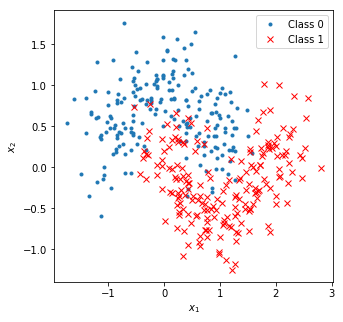

In [7]:
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(X_train[idx0,0], X_train[idx0,1], '.', label='Class 0')
plt.plot(X_train[idx1,0], X_train[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

# Using Decision Trees

In [8]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [9]:
print(accuracy_score(y_test, y_pred_tree))

0.82


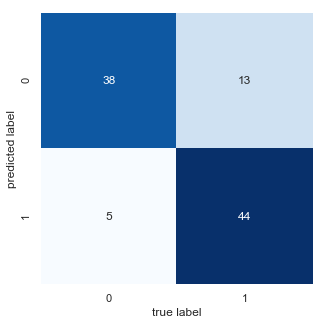

In [10]:
plot_confusion_matrix(y_test, y_pred_tree)

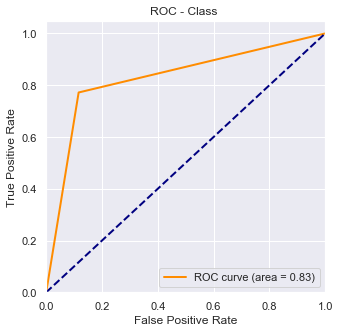

In [11]:
plot_roc_curve(tree_clf, X_test)

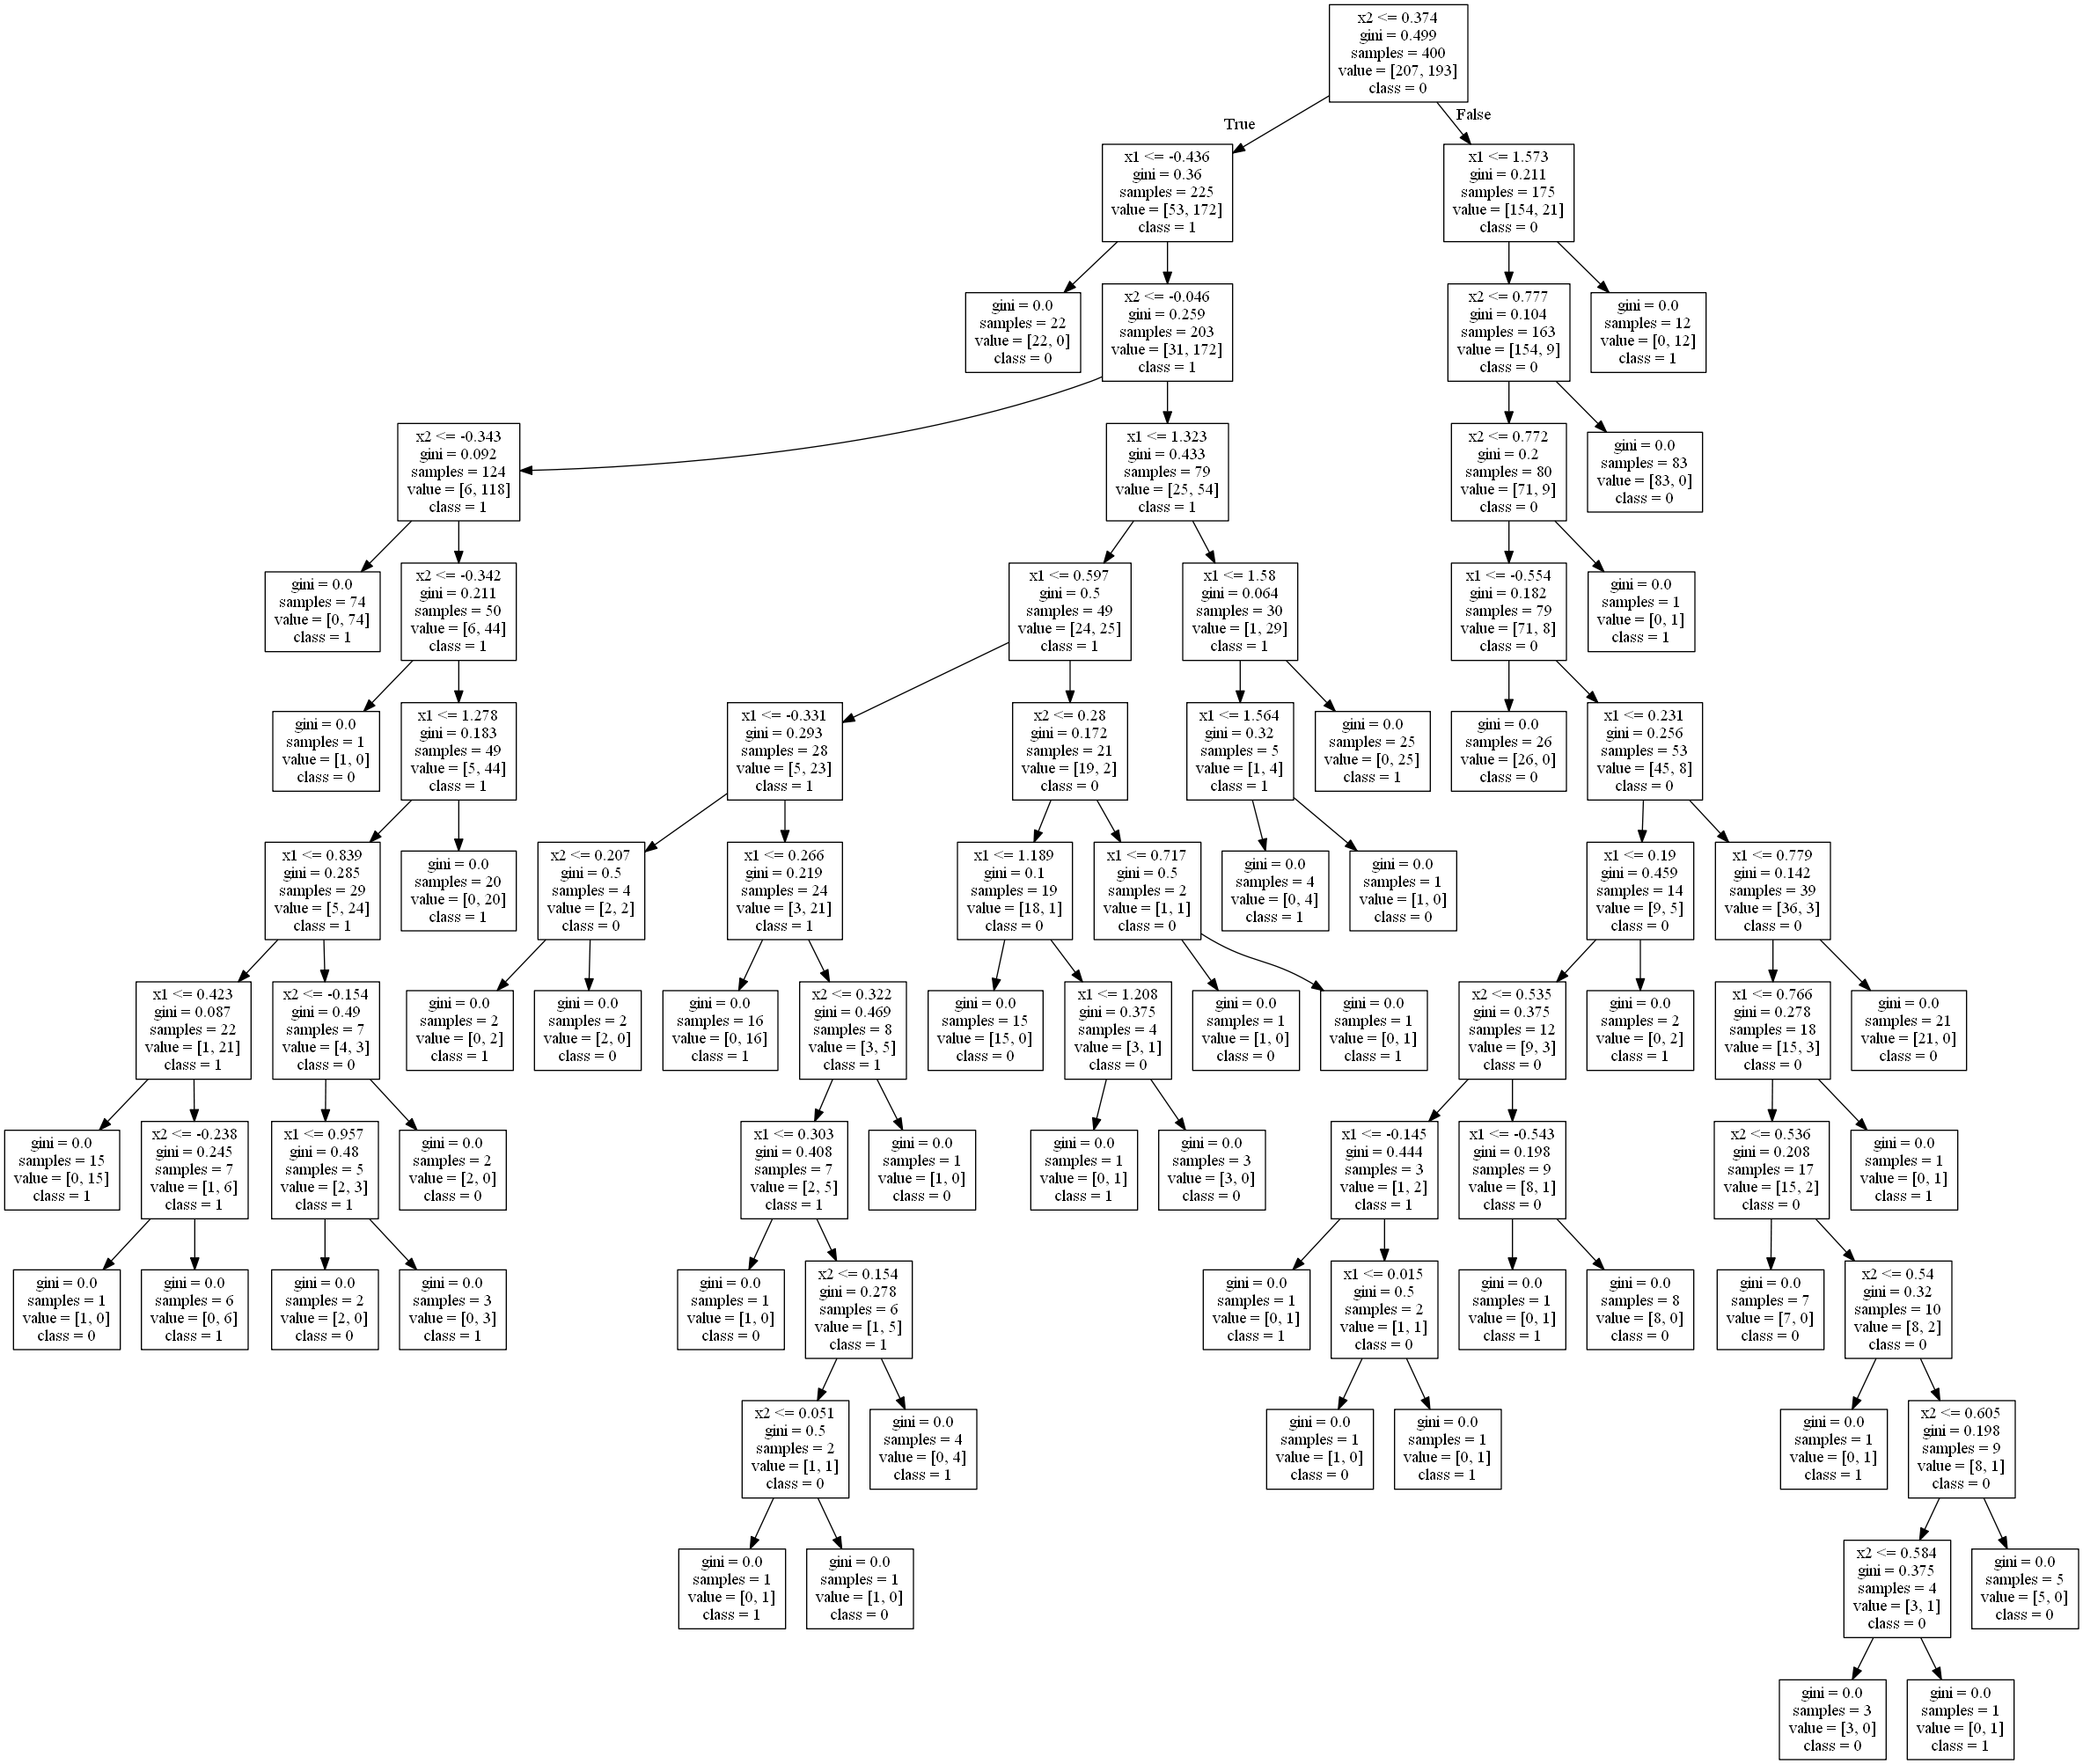

In [13]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(tree_clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Using Decision Trees with Bagging

In [19]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [20]:
print(accuracy_score(y_test, y_pred))

0.9


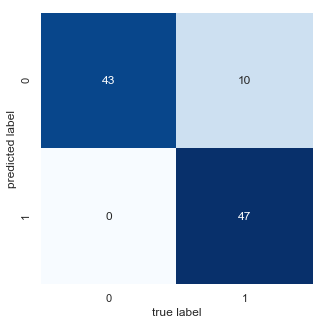

In [21]:
plot_confusion_matrix(y_test, y_pred)

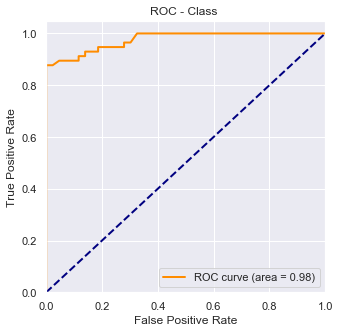

In [22]:
plot_roc_curve(bag_clf, X_test)

# Using Decision Trees with Bagging and Out-Of-bag=True

In [46]:
bag_oob_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True, random_state=42)
bag_oob_clf.fit(X_train, y_train)
y_pred = bag_oob_clf.predict(X_test)

In [47]:
print(accuracy_score(y_test, y_pred))

0.9


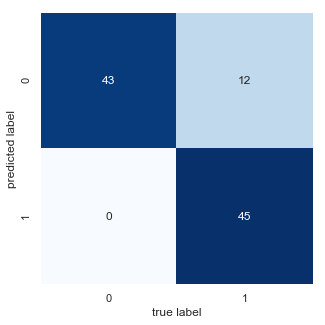

In [74]:
plot_confusion_matrix(y_test, y_pred)

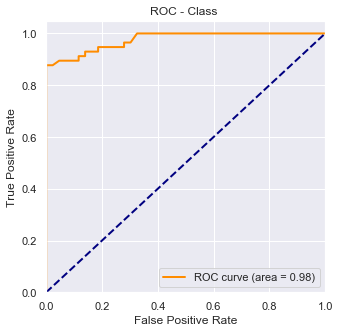

In [75]:
plot_roc_curve(bag_oob_clf, X_test)

# Using Random Forests

In [67]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, bootstrap=True, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

In [68]:
print(accuracy_score(y_test, y_pred))

0.88


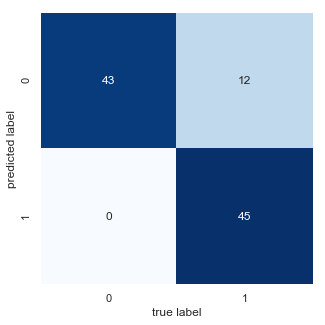

In [69]:
plot_confusion_matrix(y_test, y_pred)

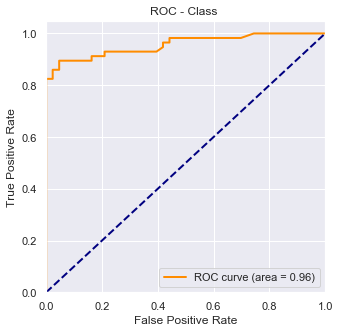

In [73]:
plot_roc_curve(rnd_clf, X_test)

# Comparing classifiers

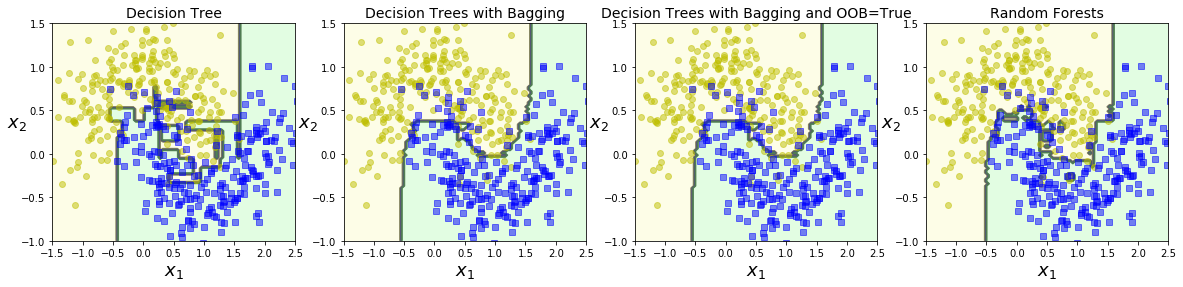

In [60]:
plt.figure(figsize=(20,4))
plt.subplot(141)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(142)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.subplot(143)
plot_decision_boundary(bag_oob_clf, X, y)
plt.title("Decision Trees with Bagging and OOB=True", fontsize=14)
plt.subplot(144)
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forests", fontsize=14)
plt.show()

## Observações

Como você pode ver, as predições do bagging ensemble provavelmente se generalizarão muito melhor do que as previsões da Árvore de Decisão: o bagging ensemble tem um bias comparável à árvore de decisão, mas uma variância menor. O bagging ensemble comete aproximadamente o mesmo número de erros no conjunto de treinamento, mas sua fronteira de decisão é menor irregular.